In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow import keras
from keras.models import Model
from keras.layers import *
from keras.utils import pad_sequences
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
# from nltk.translate.bleu_score import sentence_bleu

2023-08-11 07:39:48.195430: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-11 07:39:48.220842: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-11 07:39:48.623480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras import backend 
from tensorflow.keras import utils

In [3]:
df_full = pd.read_csv('data/PHOENIX-2014-T.train.corpus.csv', sep='|')

In [4]:
df = df_full.drop(columns=['name','video','start','end','speaker'])
df.columns

Index(['orth', 'translation'], dtype='object')

In [5]:
df.shape

(7096, 2)

In [6]:
df.describe()

,orth,translation
count,7096,7096
unique,6900,6853
top,SCHOEN ABEND TSCHUESS,guten abend liebe zuschauer
freq,22,63


In [7]:
df.iloc[0]['orth']

'JETZT WETTER MORGEN DONNERSTAG ZWOELF FEBRUAR'

In [8]:
df.iloc[0]['translation']

'und nun die wettervorhersage für morgen donnerstag den zwölften august'

In [9]:
d = {}
for s in df['orth']:
    words = s.split(' ')
    for w in words:
        if w in d.keys():
            d[w]+= 1
        else:
            d[w] = 1
sd = sorted(d, key=d.get)
sd.reverse()
print("Unique words: ",len(sd),", Total words: ",sum(d.values()))
for s in sd:
    print(s, d[s])

Unique words:  1085 , Total words:  55247
REGEN 2149
REGION 1883
IX 1505
KOMMEN 1324
MORGEN 1263
NORD 1216
SONNE 1140
WOLKE 1107
GRAD 1049
NACHT 860
SUED 835
KOENNEN 814
SCHNEE 767
AUCH 762
MEHR 752
BISSCHEN 751
HEUTE 736
BIS 685
GEWITTER 672
WETTER 669
WIND 637
WEHEN 581
ZWANZIG 536
OST 532
DANN 520
WEST 486
SCHAUER 477
MOEGLICH 433
ABEND 427
FREUNDLICH 418
NEBEL 416
BERG 414
NORDWEST 408
JETZT 404
ABER 386
STURM 385
TAG 362
TEIL 348
WIE-AUSSEHEN 341
TIEF 328
MINUS 320
FLUSS 320
SUEDOST 314
MITTE 309
WECHSELHAFT 303
KLAR 297
SONNTAG 295
SCHWACH 294
KUEHL 291
FREITAG 290
VIEL 288
TROCKEN 285
SAMSTAG 280
HOCH 274
STARK 274
MAESSIG 270
BESONDERS 269
DONNERSTAG 262
SONST 261
MEISTENS 253
IN-KOMMEND 247
BLEIBEN 243
UND 240
KALT 239
MITTWOCH 232
MONTAG 225
LAND 223
WARM 221
TEMPERATUR 221
NORDOST 219
NUR 218
SUEDWEST 217
ALPEN 215
FUENF 214
DEUTSCH 205
GUT 199
DIENSTAG 197
MITTAG 196
EINS 194
KUESTE 188
SCHOEN 184
FROST 183
ZWEI 183
DREI 182
MILD 171
HIMMEL 169
SEHEN 167
IM-VERLAUF 166
VIER

In [10]:
d = {}
for s in df['translation']:
    words = s.split(' ')
    for w in words:
        if w in d.keys():
            d[w]+= 1
        else:
            d[w] = 1
sd = sorted(d, key=d.get)
sd.reverse()
print("Unique words: ",len(sd),", Total words: ",sum(d.values()))
for s in sd:
    print(s, d[s])

Unique words:  2887 , Total words:  99081
und 4156
im 2934
es 2852
der 2462
am 2197
in 1938
die 1865
auch 1747
grad 1588
bis 1526
den 1429
morgen 1292
nacht 1042
noch 974
an 962
regen 838
heute 838
sich 825
wolken 823
ein 747
süden 742
sonne 740
norden 737
ist 722
wird 709
für 661
das 649
schauer 606
mit 604
von 582
aber 579
westen 579
dann 573
sonst 546
tag 498
wind 489
da 484
osten 483
wieder 474
auf 465
mal 461
über 460
teilweise 454
gewitter 453
aus 439
vor 436
zum 416
oder 403
nur 395
wettervorhersage 390
nun 387
etwas 385
schnee 385
hier 370
meist 367
wetter 361
abend 359
regnet 352
gibt 348
nordwesten 343
uns 334
bleibt 331
allem 315
nach 311
minus 306
zu 301
bei 296
freitag 287
sind 286
teil 282
richtung 279
weht 269
dabei 267
freundlich 265
dem 262
donnerstag 260
südosten 254
sonntag 252
samstag 249
dort 245
luft 241
werden 239
trocken 236
nebel 235
nordsee 234
mittwoch 227
temperaturen 227
südwesten 226
kann 218
mäßig 214
schon 209
einzelne 207
nordosten 206
wir 204
so 204
mo

griff 1
schwinden 1
steuern 1
regenfronten 1
versuchen 1
verbuchen 1
herbststimmung 1
klassische 1
achtzig 1
zirka 1
welche 1
trennen 1
trocknen 1
weser 1
kälteren 1
gewitterwolken 1
fragezeichen 1
produzieren 1
ungewöhnlichen 1
passauer 1
empfindlich 1
behelligt 1
gewittertief 1
geringsten 1
spätsommertag 1
gemessen 1
wabert 1
heilig 1
bewölkten 1
wirkt 1
abziehende 1
nachrichten 1
positive 1
versöhnlich 1
meteorologische 1
augustende 1
verregneten 1
auffrischt 1
karfreitag 1
beständige 1
schwarzwaldes 1
wolkennachschub 1
oberpfälzer 1
fuße 1
müritz 1
jemand 1
zweistellig 1
milderer 1
wettergeschehen 1
greifen 1
erhaben 1
einhundertsiebzehn 1
gewesen 1
werke 1
einhundertachtzig 1
einhundertfünfzig 1
windgeschwindigkeiten 1
schäden 1
aufgrund 1
südwestlicher 1
kompaktere 1
abwärts 1
apriltypisches 1
darauf 1
nennenswerte 1
altweibersommer 1
super 1
wintergewitter 1
bergisches 1
winterglück 1
türmen 1
mächtige 1
frühherbstlichen 1
schneefallrisiko 1
schwenkt 1
hochdruckkeil 1
drüben 1
l

In [11]:
data_size = df.shape[1]
input_texts = df['translation']
target_texts = df['orth']
target_texts = ['<Start> ' + text + ' <End>' for text in target_texts]

In [12]:
input_texts[0]

'und nun die wettervorhersage für morgen donnerstag den zwölften august'

In [13]:
target_texts[0]

'<Start> JETZT WETTER MORGEN DONNERSTAG ZWOELF FEBRUAR <End>'

In [14]:
target_texts = [text.replace('-', ' - ') for text in target_texts]

umlaut_dict = {'AE': 'Ä',
               'OE': 'Ö',
               'UE': 'Ü'}
for key in umlaut_dict.keys():
    target_texts = [text.replace(key, umlaut_dict[key]) for text in target_texts]

In [15]:
target_texts[0]

'<Start> JETZT WETTER MORGEN DONNERSTAG ZWÖLF FEBRUAR <End>'

In [16]:
input_texts_split = [text.split() for text in input_texts]
target_texts_split = [text.split() for text in target_texts]

input_words = sorted(set([word for text in input_texts_split for word in text]))
target_words = sorted(set([word for text in target_texts_split for word in text]))

num_input_words = len(input_words)
num_target_words = len(target_words)

input_word_index = {word: ind+1 for ind,word in enumerate(input_words)}
input_word_index[' '] = 0
target_word_index = {word: ind+1 for ind,word in enumerate(target_words)}
target_word_index[' '] = 0
#0 ce predstavljati praznina zbog paddovanja

inverted_input_word_index = {value: key for key,value in input_word_index.items()}
inverted_target_word_index = {value: key for (key,value) in target_word_index.items()}

max_input_seq_len = np.max([len(text) for text in input_texts_split])
max_target_seq_len = np.max([len(text) for text in target_texts_split])

#Pregled najduzih recenica inputa i targeta
#print(input_texts[np.argmax([len(text) for text in input_texts_split])])
#print(target_texts[np.argmax([len(text) for text in target_texts_split])]) #Ista recenica

input_pad_len = max_input_seq_len
target_pad_len = max_target_seq_len 
#Treba ova 2 staviti na vecu vrednost da bi model radio sa duzim recenicama


In [17]:
encoder_input_data = []
for text in input_texts_split:
    encoder_input_data.append([input_word_index.get(word, 0) for word in text])
encoder_input_data = pad_sequences(encoder_input_data, input_pad_len, padding = 'post')

decoder_input_data = []
decoder_output_data = []
for text in target_texts_split:
    decoder_input_data.append([target_word_index.get(word, 0) for word in text])
    decoder_output_data.append([target_word_index.get(word,0) for word in text[1:]]) 
decoder_input_data = pad_sequences(decoder_input_data, target_pad_len, padding = 'post')
decoder_output_data = pad_sequences(decoder_output_data, target_pad_len, padding = 'post')

In [18]:
encoder_input_data.shape

(7096, 52)

In [19]:
decoder_input_data.shape

(7096, 36)

In [20]:
decoder_output_data.shape

(7096, 36)

In [21]:
embedding_size = 300

input_word_embeddings = {}
target_word_embeddings = {}
with open('glove-embedding/vectors.txt', 'r', encoding = 'utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype = 'float32')
        input_word_embeddings[word] = coefs
        target_word_embeddings[word.upper()] = coefs

In [22]:
oov_words_input = []
for word in input_words:
    if not word in input_word_embeddings:
        oov_words_input.append(word)

In [23]:
oov_words_target = []
for word in target_words:
    if not word in target_word_embeddings:
        oov_words_target.append(word)

In [24]:
input_embedding_matrix = np.zeros((num_input_words + 1, embedding_size))
for i in range(num_input_words):
    input_embedding_matrix[i + 1] = input_word_embeddings.get(inverted_input_word_index[i+1], np.zeros(embedding_size))

target_embedding_matrix = np.zeros((num_target_words + 1, embedding_size))
for i in range(num_target_words):
    target_embedding_matrix[i + 1] = target_word_embeddings.get(inverted_target_word_index[i+1], np.zeros(embedding_size))

In [25]:
latent_dim = 128

In [37]:
encoder_input_tensor = Input(shape = (input_pad_len, ))
encoder_embedding = Embedding(input_dim = num_input_words + 1, output_dim = embedding_size, weights = [input_embedding_matrix], trainable = True)(encoder_input_tensor)
encoder_gru, encoder_gru_state = GRU(latent_dim, dropout=0.5, return_state=True)(encoder_embedding)
# encoder_attention = Attention()([encoder_gru, encoder_gru])
# encoder_output = Dense(units = latent_dim)(encoder_attention)

In [38]:
decoder_input_tensor = Input(shape = (target_pad_len, ))
decoder_embedding = Embedding(input_dim = num_target_words + 1, output_dim = embedding_size, mask_zero = True, weights = [target_embedding_matrix], trainable = True)(decoder_input_tensor)
decoder_gru = GRU(latent_dim, return_sequences=True, dropout=0.5)(decoder_embedding, initial_state=encoder_gru_state)
decoder_output = Dense(num_target_words + 1, activation = 'softmax')(decoder_gru)

In [39]:
model_gru = Model(inputs = [encoder_input_tensor, decoder_input_tensor], outputs = decoder_output)
model_gru.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 52)]                 0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 36)]                 0         []                            
                                                                                                  
 embedding_8 (Embedding)     (None, 52, 300)              866400    ['input_9[0][0]']             
                                                                                                  
 embedding_9 (Embedding)     (None, 36, 300)              293400    ['input_10[0][0]']            
                                                                                            

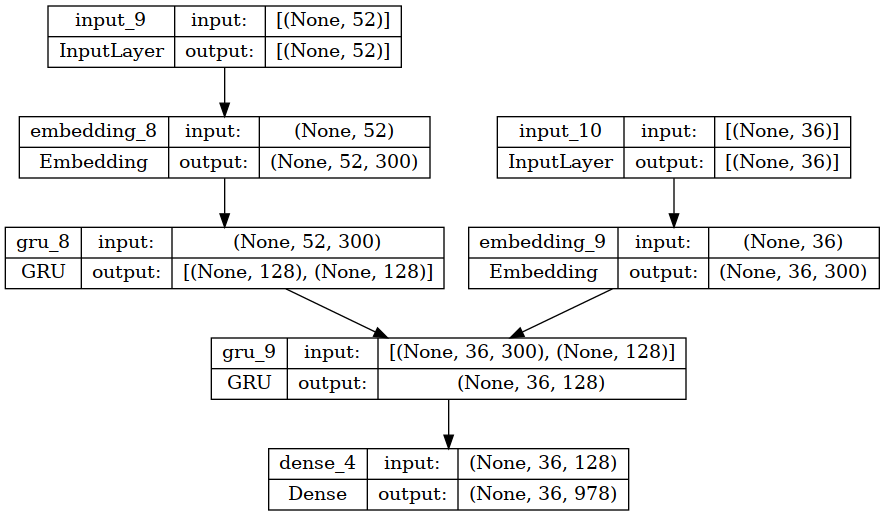

In [40]:
import pydot
utils.plot_model(model_gru, show_shapes=True)

In [41]:
model_gru.compile(optimizer = Adam(0.001), loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
batch_size = 64
epochs = 50

In [44]:
checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min')

In [45]:
history = model_gru.fit([encoder_input_data, decoder_input_data], decoder_output_data, epochs = epochs, batch_size = batch_size, validation_split = 0.1, callbacks = [checkpoint])

Epoch 1/50


2023-08-11 07:50:40.623001: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-08-11 07:50:40.644161: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT8
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'cond_41/output/_22'
2023-08-11 07:50:40.854464: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-08-11 07:50:40.93056

100/100 [==============================] - 12s 85ms/step - loss: 4.8789 - acc: 0.1578 - val_loss: 4.1704 - val_acc: 0.2394
Epoch 2/50
100/100 [==============================] - 3s 30ms/step - loss: 4.0432 - acc: 0.2590 - val_loss: 3.7730 - val_acc: 0.2998
Epoch 3/50
100/100 [==============================] - 2s 23ms/step - loss: 3.7496 - acc: 0.2943 - val_loss: 3.5691 - val_acc: 0.3124
Epoch 4/50
100/100 [==============================] - 1s 10ms/step - loss: 3.5661 - acc: 0.3100 - val_loss: 3.4373 - val_acc: 0.3240
Epoch 5/50
100/100 [==============================] - 1s 12ms/step - loss: 3.4400 - acc: 0.3208 - val_loss: 3.3521 - val_acc: 0.3366
Epoch 6/50
100/100 [==============================] - 1s 9ms/step - loss: 3.3396 - acc: 0.3324 - val_loss: 3.2710 - val_acc: 0.3474
Epoch 7/50
100/100 [==============================] - 1s 11ms/step - loss: 3.2276 - acc: 0.3471 - val_loss: 3.1738 - val_acc: 0.3582
Epoch 8/50
100/100 [==============================] - 1s 8ms/step - loss: 3.1220

In [57]:
best_epoch = np.argmin(history.history['val_loss'])
print("Best epoch:",str(best_epoch) + "/" + str(epochs))
print("loss:",history.history['loss'][best_epoch])
print("acc:",history.history['acc'][best_epoch])
print("val_loss:",history.history['val_loss'][best_epoch])
print("val_acc:",history.history['val_acc'][best_epoch])

Best epoch: 29/50
loss: 2.155787467956543
acc: 0.4992053210735321
val_loss: 2.6851797103881836
val_acc: 0.44899654388427734


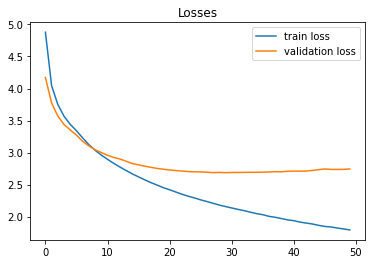

In [46]:
epochs_vals = range(0, epochs)
losses=history.history['loss']
val_losses=history.history['val_loss']
plt.title('Losses')
plt.plot(epochs_vals, losses, label='train loss')
plt.plot(epochs_vals, val_losses, label='validation loss')
plt.legend(loc='best')
plt.show()

In [ ]:
def translate2(input_sentence):
    #Code input sentence
    input_sentence = input_sentence.replace('.', '').replace(',', '').replace('!','').replace('"','').replace('?','').lower()
    words = input_sentence.split(' ')
    coded_words =[input_word_index.get(word, 0) for word in words]
    coded_words = pad_sequences([coded_words], maxlen = input_pad_len, padding = 'post')
    #Initialize decoder input with starting token
    decoder_input = np.reshape(target_word_index['<Start>'], (1,1))
    decoder_input = pad_sequences(decoder_input, target_pad_len, padding = 'post') #Pad decoder_input
    #Pass through the whole model sequentially:
    output_sentence = []
    for i in range(target_pad_len):
        decoder_output = model_gru.predict([coded_words, decoder_input], verbose = 0)
        next_word = np.argmax(decoder_output[0, i])
        if next_word == 0:
            break
        output_sentence.append(next_word)
        if i < target_pad_len - 1:
            decoder_input[0, i+1] = next_word
    return ' '.join(inverted_target_word_index[num] for num in output_sentence).replace(' - ', '-')